# 11: Pandas for data analysis with Python: Part 2

## Learning objectives

Last week, we learned:
- Pandas is a library in Python that is designed for data manipulation and analysis
- How to use libraries (import them, access their functions and data structures with `library.function_name()`)
- About the `dataframe` data structure: basically a smart spreadsheet, with rows of observations, and columns of variables/data for each observation - sort of a cross between a list (sortable, indexable) and a dictionary (quickly access data by key)
- Some basic operations: constructing a dataframe, summarizing, subsetting, reshaping

This week, we'll most dig into more advanced operations for reshaping/modifying your dataframe:
- Use `.apply()` to apply functions to one or more columns to generate new columns
- Use `.groupby()` to split your data into subgroups, apply some function to their data, then combine them into a new dataframe for further analysis (the "**split-apply-combine**" pattern that is fundamental to data analysis with pandas)
- Use some basic plotting functions to explore your data

These roughly correspond to Qs 6-8 in your PCEs.

If we have time, we'll learn a bit more about summarization:
- Use `.value_counts()` to summarize categorical data
- How to plot data

## Creating/modifying data columns based on one or more columns using `.apply()`

More advanced operations on dataframes involve modifying or creating new columns!

In data analysis, we often want to do things to data in our columns for data preparation/cleaning. Sometimes there is missing data we want to recode, or we want to redescribe data or reclassify it for our analysis. We can do this with a combination of functions and the `apply()` method.

In this way, again making a connection back to lists, `.apply()` is a little like the `map()` function that we used for lists to transform items from one list to another list with equal length (e.g., convert scores to letter grades).

### `.apply()` with a single column

The simpler version of `.apply()` only takes input from one column.

To illustrate let's do some operations on the dataset `INST courses.csv`. 

In [6]:
# import the pandas library
import pandas as pd

# read in the dataset
fpath = 'INST courses.csv'
courses = pd.read_csv(fpath) # read in the file into a dataframe called courses
courses # use the .head() function to show the top 5 rows in the dataframe

Code                                              Title  \
0    INST126  Introduction to Programming for Information Sc...   
1    INST201                Introduction to Information Science   
2    INST311                           Information Organization   
3    INST314                 Statistics for Information Science   
4    INST326  Object-Oriented Programming for Information Sc...   
5    INST327                       Database Design and Modeling   
6    INST335                            Teams and Organizations   
7    INST346       Technologies Infrastructure and Architecture   
8    INST352              Information User Needs and Assessment   
9    INST354            Decision-Making for Information Science   
10   INST362                               User-Centered Design   
11   INST377                           Dynamic Web Applications   
12  INST408Y  Special Topics in Information Science; Privacy...   
13  INST408Z  Special Topics in Information Science; The Apo...   
14   INST414                            Data Science Techniques   
15   INST447                      Data Sources and Manipulation   
16   INST462                 Introduction to Data Visualization   
17   INST466                   Technology, Culture, and Society   
18   INST490        Integrated Capstone for Information Science   
19   INST604      Introduction to Archives and Digital Curation   
20   INST612                                 Information Policy   
21   INST614                             Literacy and Inclusion   
22   INST616                           Open Source Intelligence   
23   INST622                Information and Universal Usability   
24   INST627       Data Analytics for Information Professionals   
25   INST630  Introduction to Programming for the Informatio...   
26   INST652                          Design Thinking and Youth   
27   INST702                         Advanced Usability Testing   
28   INST709                                  Independent Study   
29  INST728G  Special Topics in Information Studies; Smart C...   
30  INST728V  Special Topics in Information Studies; Digital...   
31   INST733                                    Database Design   
32   INST737                       Introduction to Data Science   
33   INST741     Social Computing Technologies and Applications   
34   INST742                      Implementing Digital Curation   
35   INST746                    Digitization of Legacy Holdings   
36   INST762                                   Visual Analytics   
37   INST767                            Big Data Infrastructure   
38   INST776                              HCIM CAPSTONE PROJECT   
39   INST785  Documentation, Collection, and Appraisal of Re...   
40   INST794                       Capstone in Youth Experience   

                                          Description  \
0   An introduction to computer programming for st...   
1   Examining the effects of new information techn...   
2   Examines the theories, concepts, and principle...   
3   Basic concepts in statistics including measure...   
4   An introduction to programming, emphasizing un...   
5   Introduction to databases, the relational mode...   
6   Team development and the principles, methods a...   
7   Examines the basic concepts of local and wide-...   
8   Focuses on use of information by individuals, ...   
9   Examines the use of information in organizatio...   
10  Introduction to human-computer interaction (HC...   
11  An exploration of the basic methods and tools ...   
12                                                      
13                                                      
14  An exploration of how to extract insights from...   
15  Examines approaches to locating, acquiring, ma...   
16  Exploration of the theories, methods, and tech...   
17  Individual, cultural, and societal outcomes as...   
18  The capstone provides a platform for Informati...   
19  Overview of the principles, practices, and app...

Let's say we want to have a prereqs column that is sortable, maybe 0 = No prereqs, and 1 = has prereqs

#### Step 1: Define the function you want to apply

In [7]:
# Step 1: define the function you want to apply
def has_prereq(prereq_descr):
  # assume we get a string prereq description
  if pd.isnull(prereq_descr):
    return 0
  elif "None" in prereq_descr:
    return 0
  else:
    return 1

In [8]:
# test the function
prereq = "BMGT301; or instructor permission" # this should yield 1
prereq2 = "None" # this should yield 0
print(has_prereq(prereq))
print(has_prereq(prereq2))

1
0


#### Step 2: Apply the function to a column and save the result in a (new) column

In [9]:
# Step 2: apply it to a column and save the result in the (new) `had_prereqs` column
courses['has_prereqs'] = courses['Prereqs'].apply(has_prereq) # apply the has_prereq() function to every row in the prereqs column in the courses data frame
courses.head(10)

Code                                              Title  \
0  INST126  Introduction to Programming for Information Sc...   
1  INST201                Introduction to Information Science   
2  INST311                           Information Organization   
3  INST314                 Statistics for Information Science   
4  INST326  Object-Oriented Programming for Information Sc...   
5  INST327                       Database Design and Modeling   
6  INST335                            Teams and Organizations   
7  INST346       Technologies Infrastructure and Architecture   
8  INST352              Information User Needs and Assessment   
9  INST354            Decision-Making for Information Science   

                                         Description  \
0  An introduction to computer programming for st...   
1  Examining the effects of new information techn...   
2  Examines the theories, concepts, and principle...   
3  Basic concepts in statistics including measure...   
4  An introduction to programming, emphasizing un...   
5  Introduction to databases, the relational mode...   
6  Team development and the principles, methods a...   
7  Examines the basic concepts of local and wide-...   
8  Focuses on use of information by individuals, ...   
9  Examines the use of information in organizatio...   

                                             Prereqs  Credits  has_prereqs  
0  Minimum grade of C- in MATH115; or must have m...      3.0            1  
1                                               None      3.0            0  
2  Must have completed or be concurrently enrolle...      3.0            1  
3  Must have completed or be concurrently enrolle...      3.0            1  
4  1 course with a minimum grade of C- from (INST...      3.0            1  
5  1 course with a minimum grade of C- from (CMSC...      3.0            1  
6  1 course with a minimum grade of C- from (INST...      3.0            1  
7  1 course with a minimum grade of C- from (INST...      3.0            1  
8  1 course with a minimum grade of C- from (INST...      3.0            1  
9                                           INST314.      3.0            1

Another example: let's say we want ot know if a course is an introductory course. How might we do this?

In [11]:
# first define a function to check if the course is an intro course
def is_intro(title):
    if "introduction" in title.lower():
        return 1
    else:
        return 0

# then apply it to the courses column and save the result in the (new) `is_intro` column
courses['is_intro'] = courses['Title'].apply(is_intro)
courses.head(10)

Code                                              Title  \
0  INST126  Introduction to Programming for Information Sc...   
1  INST201                Introduction to Information Science   
2  INST311                           Information Organization   
3  INST314                 Statistics for Information Science   
4  INST326  Object-Oriented Programming for Information Sc...   
5  INST327                       Database Design and Modeling   
6  INST335                            Teams and Organizations   
7  INST346       Technologies Infrastructure and Architecture   
8  INST352              Information User Needs and Assessment   
9  INST354            Decision-Making for Information Science   

                                         Description  \
0  An introduction to computer programming for st...   
1  Examining the effects of new information techn...   
2  Examines the theories, concepts, and principle...   
3  Basic concepts in statistics including measure...   
4  An introduction to programming, emphasizing un...   
5  Introduction to databases, the relational mode...   
6  Team development and the principles, methods a...   
7  Examines the basic concepts of local and wide-...   
8  Focuses on use of information by individuals, ...   
9  Examines the use of information in organizatio...   

                                             Prereqs  Credits  has_prereqs  \
0  Minimum grade of C- in MATH115; or must have m...      3.0            1   
1                                               None      3.0            0   
2  Must have completed or be concurrently enrolle...      3.0            1   
3  Must have completed or be concurrently enrolle...      3.0            1   
4  1 course with a minimum grade of C- from (INST...      3.0            1   
5  1 course with a minimum grade of C- from (CMSC...      3.0            1   
6  1 course with a minimum grade of C- from (INST...      3.0            1   
7  1 course with a minimum grade of C- from (INST...      3.0            1   
8  1 course with a minimum grade of C- from (INST...      3.0            1   
9                                           INST314.      3.0            1   

   is_intro  
0         1  
1         1  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0

If you're lazy, you can pass in anonymous functions too, with `lambda`: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

In [15]:
is_introductory = courses['Title'].apply(lambda title: 1 if "introduction" in title.lower() else 0)
is_introductory.head(10) # show the top 10

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Title, dtype: int64

##### What's happening under the hood when you `.apply()` a function to a column

Pandas is *iterating* through every row in that column, and *applying* the function to the value in that row.

In [17]:
# let's show this for the first 10 courses
for prereq in courses['Prereqs'].head(10):
    print(f"Result of applying has_prereq() to {prereq}: {has_prereq(prereq)}")

Result of applying has_prereq() to Minimum grade of C- in MATH115; or must have math eligibility of MATH140 or higher; or permission of instructor.: 1
Result of applying has_prereq() to None: 0
Result of applying has_prereq() to Must have completed or be concurrently enrolled in INST201; or INST301.: 1
Result of applying has_prereq() to Must have completed or be concurrently enrolled in INST201; or must have completed or be concurrently enrolled in INST301. And minimum grade of C- in INST201 and INST301; and MATH115; and STAT100; and minimum grade of C- in MATH115 and STAT100.: 1
Result of applying has_prereq() to 1 course with a minimum grade of C- from (INST126, CMSC106); and must have completed or be concurrently enrolled in INST201 or INST301. And minimum grade of C- in INST201; or minimum grade of C- in INST301.: 1
Result of applying has_prereq() to 1 course with a minimum grade of C- from (CMSC106, CMSC122, INST126); and must have completed or be concurrently enrolled in INST201 

The `.apply()` function returns a pandas Series that is the same length as the input column (which is also a Series), with a corresponding value for each input.

In [18]:
print(f"the Prereqs column has {len(courses['Prereqs'])} rows")
print(f"the Series created by applying `has_prereq()` to the Prereqs column has {len(courses['Prereqs'].apply(has_prereq))} rows")

the Prereqs column has 41 rows
the Series created by applying `has_prereq()` to the Prereqs column has 41 rows


To save the results of the `apply()` for later analysis, we then need to assign it to a column, new or existing. 

Remember, pandas prefers immutability in general (return a new object instead of modifying the object), and sometimes enforces it. With `.apply()`, it's enforced: you can't directly modify the column, you have to assign the returned Series to a column if you want it to persist.

Like with other assignment statements, just running the `.apply()` and assigning its return value to a column will not yield output. You'll need to print out the dataframe to check the results.


**PRACTICE:** Let's say I want to know how many courses we have in each area. We don't have that data in the dataset; at least not explicitly. Fortunately we can make it with some simple programming that you already know how to do! The problem here is, given a code (i.e., data from one column), how do we "extract" the area?

In [ ]:
# Step 1: define the function
def extract_area(code):
    # heuristic: just grab the first four characters
    return 

In [ ]:
c = "CMSC250"
extract_area(c)

In [ ]:
# Step 2: apply the function
courses['area'] = courses['code'].apply(extract_area)
courses.head(10)

**PRACTICE**: With the `wunderground.csv` dataset, how can we extract the year/month/day from the date column?

**PRACTICE:** With the `BreadBasket_DMS.csv` dataset, how can we extract the hour for each transaction from the Time column?

In [ ]:
# the bread dataset
bread = pd.read_csv("data/BreadBasket_DMS.csv")

In [ ]:
def extract_hour(time):
    return 

bread['Hour'] = bread['Time'].apply(extract_hour)
bread.sort_values(by="Hour")

### `.apply()` with data from multiple columns

What if you want to have a way to filter the courses in terms of "easy entry points" (i.e., both introductory *and* has no prerequisites)? That might also be interesting to analyze by area to see how many departments offer these easy entry points into the department for students from other departments.

Core thing we need to know here is that our `.apply()` will now apply a function that has a **row** as input, not an element of a single column. That way, we can access data from any column in the row: in this case, data from the "is_intro" and "has_prereq" columns.

There are two key differences between this use of `.apply()` and the single-column case:
1. First, we do `.apply()` with the whole dataframe, not from a single column
2. We specify an argument for the `axis` parameter to tell it to use rows as inputs. We need to pass the argument `1` to the axis parameter when we call `.apply()` so it knows to pass a row into the function, not just a single column element. See here for more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [20]:
# is_entry_point function
def is_entry_point(row):
  # if the value of the "is intro" column for this row is 1
  # AND the value of hte "has_prereq" column for this row is 0
  # return 1
  if row['is_intro'] == 1 and row['has_prereqs'] == 0: 
    return 1
  else:
    return 0

In [21]:
# this should yield 1
test_row = {
    'is_intro': 1,
    'has_prereqs': 0
}

# this should yield 0
test_row2 = {
    'is_intro': 1,
    'has_prereqs': 1
}

print(is_entry_point(test_row))
print(is_entry_point(test_row2))

1
0


In [22]:
# Step 2 apply the function and save the result
courses['is_entrypoint'] = courses.apply(is_entry_point, axis=1) # need to specify axis=1 to apply it to every row
# courses['classlevel'] = courses['classcode'].apply(level)
courses.head()

# compare to .apply() with a single column
# courses['is_intro'] = courses['title'].apply(is_intro)
# key differences:
# - here for multiple columns, we start with the whole dataframe, instead of a specific column
# - and we pass the argument 1 to the axis parameter instead of letting it use the default 0 value

Code                                              Title  \
0  INST126  Introduction to Programming for Information Sc...   
1  INST201                Introduction to Information Science   
2  INST311                           Information Organization   
3  INST314                 Statistics for Information Science   
4  INST326  Object-Oriented Programming for Information Sc...   

                                         Description  \
0  An introduction to computer programming for st...   
1  Examining the effects of new information techn...   
2  Examines the theories, concepts, and principle...   
3  Basic concepts in statistics including measure...   
4  An introduction to programming, emphasizing un...   

                                             Prereqs  Credits  has_prereqs  \
0  Minimum grade of C- in MATH115; or must have m...      3.0            1   
1                                               None      3.0            0   
2  Must have completed or be concurrently enrolle...      3.0            1   
3  Must have completed or be concurrently enrolle...      3.0            1   
4  1 course with a minimum grade of C- from (INST...      3.0            1   

   is_intro  is_entrypoint  
0         1              0  
1         1              1  
2         0              0  
3         0              0  
4         0              0

In [27]:
# show me all the courses that are intro and have no prereqs
courses[courses['is_entrypoint'] == 1]
# if we have a list, we can do indexing like this to get the first 4 elements, say: courses[:4]
# if we have a dictionary, we can retrieve base don key, like this courses['hello']

Code                                              Title  \
1   INST201                Introduction to Information Science   
19  INST604      Introduction to Archives and Digital Curation   
25  INST630  Introduction to Programming for the Informatio...   

                                          Description Prereqs  Credits  \
1   Examining the effects of new information techn...    None      3.0   
19  Overview of the principles, practices, and app...    None      3.0   
25  An introduction to computer programming intend...    None      3.0   

    has_prereqs  is_intro  is_entrypoint  
1             0         1              1  
19            0         1              1  
25            0         1              1

More examples?

In [28]:
# for ncaa: make a column that is 1 if you had a winning season AND reached the round of 32
ncaa = pd.read_csv("data/ncaa-team-data-cleanCoachNames.csv")
ncaa.head()

def underdog_season(row):
    if row['w'] < 21 and row['ncaa_result'] == "Won National Final":
        return 1
    else:
        return 0
    
ncaa['underdog'] = ncaa.apply(underdog_season, axis=1)
ncaa[ncaa['underdog']==1]

Unnamed: 0     school     conf  rk   w  l  srs  sos  pts_for  pts_vs  \
8229         8229    indiana  Big Ten  78  20  3  NaN  NaN      NaN     NaN   
23515       23515  wisconsin  Big Ten  77  20  3  NaN  NaN      NaN     NaN   

       ...  ap_pre  ap_high  ap_final  pts_diff         ncaa_result  \
8229   ...      30       30        30       NaN  Won National Final   
23515  ...      30       30        30       NaN  Won National Final   

      ncaa_numeric   season  year             coach underdog  
8229            48  1939-40  1939  Branch McCracken        1  
23515           48  1940-41  1940        Bud Foster        1  

[2 rows x 21 columns]

In [26]:
set(ncaa['ncaa_result'])

{'Lost First Four',
 'Lost First Round',
 'Lost National Final',
 'Lost National Semifinal',
 'Lost Opening Round',
 'Lost Regional Final',
 'Lost Regional Final (Final Four)',
 'Lost Regional Semifinal',
 'Lost Second Round',
 'Lost Third Round',
 'Playing First Four',
 'Playing First Round',
 'Won National Final',
 nan}

In [ ]:
# for ncaa: create a column taht is 1 if the pt differential is non-negative BUT the team didn't make the playoffs (numeric >= 32 or 0)

In [ ]:
# apply the get_month function to every value in the Date column in bread
# and store the resulting series in the Month column

In [ ]:
# convert the ncaa_result column to a numerical ranking of season outcome

## Analyze subgroups of your data with the split-apply-combine pattern

Going more deeply on the path of "reshaping", we often want to compute data based on subsets of the data, grouped by some column.

For example, we might want to see how many departments offer easy entry points. 

We can do this with the "split-apply-combine" pattern, which is implemented in the `.groupby()` function.

Basically, it goes like this:
1. **Split** the data into subgroups (e.g., split courses into department subgroups)
2. **Apply** some computation on each subgroup (e.g., find number of easy entry points for each department subgroup)
3. **Combine** subgroup-computation information into an overall new dataframe that has subgroups as entries

Here's a picture with a simpler datset to give an intuition:
<img src="https://miro.medium.com/v2/resize:fit:1400/1*w2oGdXv5btEMxAkAsz8fbg.png" height=600 width=800></img>

In [ ]:
for area, areaData in courses.groupby('area'):
    print(area)
    print(areaData)

### Split with `.groupby()`

The first step is to split the dataset into subgroups.

The manual way

In [32]:
# get all the unique area values
course_areas = set(courses['area'].values)

# iterate through each unique area value
for area in course_areas:
    print(area)
    # get the subset of the course data that is associated with this area
    area_df = courses[courses['area'] == area]
    print(area_df.head())
    # summarize the credits for this subset of hte dataframe
    print(area_df['credits'].mean())
    print("\n")

PLCY
         code                                              title  \
319  PLCY101                    Great Thinkers on Public Policy    
320  PLCY201                 Public Leaders and Active Citizens    
321  PLCY215    Innovation and Social Change: Creating Change...   
322  PLCY301                                     Sustainability    
323  PLCY302               Examining Pluralism in Public Policy    

                                           description prereqs  credits  \
319   Great ideas in public policy, such as equalit...   None         3   
320   Aims to inspire, teach and engage students in...   None         3   
321   A team-based, highly interactive and dynamic ...   None         3   
322   Designed for students whose academic majors w...   None         3   
323   Understanding pluralism and how groups and in...   None         3   

    prereq_type  area  has_prereqs  is_intro  is_entrypoint  
319        None  PLCY            0         0              0  
320        

The `.groupby()` way

In [33]:
# use groupby to split the courses df into subsets grouped by area
# we can iterate through the resulting collection of dataframe subsets
# where each step in the iteration allows us to grab 
# 1. the name of the subset, which is the shared value (in this case area)
# 2. the subset dataframe (here called areaDF)
for area, areaDF in courses.groupby('area'):
    print(area)
    print(areaDF.head())
    print(areaDF['credits'].mean()) # starting to get into the "apply"

AMST
        code                                              title  \
0   AMST101                      Introduction American Studies    
1  AMST298C             Introduction to Asian American Studies    
2   AMST340    Introduction to History, Theories and Methods...   
3  AMST418N                       Asian American Public Policy    
4   AMST450                        Seminar in American Studies    

                                         description  \
0   Introduces students to the interdisciplinary ...   
1   The aggregate experience of Asian Pacific Ame...   
2   Introduction to the process of interdisciplin...   
3                                                      
4   Developments in theories and methods of Ameri...   

                                             prereqs  credits prereq_type  \
0                                              None         3        None   
1                                              None         3        None   
2   Must have completed 

In [ ]:
courses.head()

### Apply and Combine

#### The "manual" way: apply and combine into a new dataframe we construct from scratch

In [34]:
# create an empty list to hold the new rows of the new COMBINED dataframe
eba = []
# SPLIT the dataframe by area, and iterate through each split
for area, areaDF in courses.groupby('area'): 
  
    # APPLY operations on the dataframe split
    # count the number of entry point courses in the subarea
    num_entrypoints = areaDF['is_entrypoint'].sum()
    
    # count the number of total courses in the subarea
    num_classes = len(areaDF)
    
    # count the ratio of entry points to total classes
    entrypoint_ratio = num_entrypoints/num_classes
    
    # prepare a new row to put into the COMBINEd dataframe that has areas as rows instead of courses
    # the row is represented as a dictionary, where each key is a column
    entry = {
      'area': area, # each row is an area
      'num_entrypoints': num_entrypoints, 
      'num_classes': num_classes,
        'entry_point_ratio': entrypoint_ratio
    }
    # COMBINE the resulting subcomputation into a new dataset
    eba.append(entry) 
# convert the list of new entries into a dataframe
eba = pd.DataFrame(eba)
eba

area  num_entrypoints  num_classes  entry_point_ratio
0   AMST                2            9           0.222222
1   BMGT                1           53           0.018868
2   CMSC                1           46           0.021739
3   COMM                0           31           0.000000
4   ECON                0           64           0.000000
5   ENSP                2            6           0.333333
6   ENTS                0            4           0.000000
7   INFM                0            5           0.000000
8   INST                4           47           0.085106
9   MATH                0           49           0.000000
10  PHSC                0            5           0.000000
11  PLCY                0           28           0.000000
12  PSYC                1           38           0.026316
13  SPHL                0            7           0.000000
14  STAT                0           15           0.000000
15  URSP                0            7           0.000000

In [35]:
# how many classes are in each area?
# make a data frame that summarizes it

# make a list to hold the combined data by subgroup
summarized = []

# SPLIT-APPLY-COMBINE
# SPLIT the dataset by area
for area, areaData in courses.groupby('area'):
    # APPLY a computation to get the number of courses
    # which is just the number of rows in this subset dataframe
    num_courses = len(areaData)
    entry = {
        'area': area,
        'num_courses': num_courses
    }
    # add it to the COMBINED summarized dataset
    summarized.append(entry)

# turn the list of dictionaries into a dataframe
summarized = pd.DataFrame(summarized)
summarized

area  num_courses
0   AMST            9
1   BMGT           53
2   CMSC           46
3   COMM           31
4   ECON           64
5   ENSP            6
6   ENTS            4
7   INFM            5
8   INST           47
9   MATH           49
10  PHSC            5
11  PLCY           28
12  PSYC           38
13  SPHL            7
14  STAT           15
15  URSP            7

In [ ]:
# iterate through the dataframe, row by row
for index, row in eba.iterrows():
    print(row['area'])
    print(row['prereq_classes'])

We can define a whole new function that is much more complicated than a simple sum or mean, to APPLY to each subset of our SPLIT

For example, we can write a function that takes in a prereq description, and extracts all the prereq classes mentinoed in the description

In [36]:
def extract_prereqs(descr):
    prereqs = []
    for word in descr.split():
        # clean the word
        clean_word = ""
        for char in word:
            if char.isalpha() or char.isdigit():
                clean_word += char
        if len(clean_word) == 7 and clean_word[:4].isalpha() and clean_word[-3:].isdigit():
            prereqs.append(clean_word)
    return prereqs

In [ ]:
for area, areaDF in courses.groupby('area'):
    
    area_prereqs = set()
    for prereq in areaDF['prereqs']:
        prereqs = extract_prereqs(prereq)

In [ ]:
for prereq_descr in courses[courses['has_prereqs'] == 1]['prereqs'].values:
    print(prereq_descr)
    print(extract_prereqs(prereq_descr))

#### Shortcut apply-combine with `.agg()`

A more concise way to apply and combine is to chain the `.agg()` function to a `.groupby()` object to tell pandas to *aggregate* particular columns in particular ways (e.g., count the number of entry point courses in a given department, vs. give an average *proportion* of classes that are entry points).

In [37]:
# SPLIT by area
courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    # APPLY tehse computations and COMBINE into a new data frame using .agg
    num_entrypoints=('is_entrypoint', sum), 
    num_classes=('area', "count")
)

area  num_entrypoints  num_classes
0   AMST                2            9
1   BMGT                1           53
2   CMSC                1           46
3   COMM                0           31
4   ECON                0           64
5   ENSP                2            6
6   ENTS                0            4
7   INFM                0            5
8   INST                4           47
9   MATH                0           49
10  PHSC                0            5
11  PLCY                0           28
12  PSYC                1           38
13  SPHL                0            7
14  STAT                0           15
15  URSP                0            7

Anatomy of combining `.groupby()` with `.agg()`

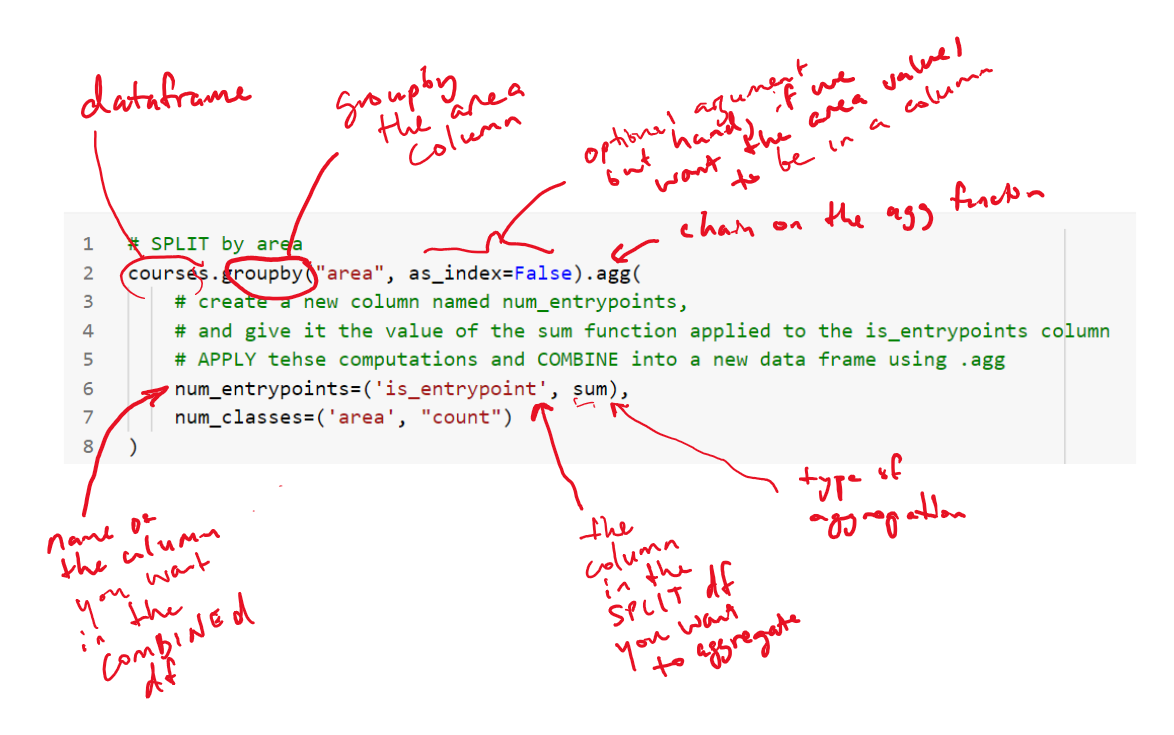

This pattern is explained in the section "Recommended: Tuple Named Aggregations" in this article: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [ ]:
# group the courses by the area column (and make sure that they show up as columns in the resulting dataframe)
# then apply the functions in the .agg() function to each subgroup
# and stitch it back into a dataframe that we'll put into the entrypoints_by_area variable
entrypoints_by_area = courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    the_num_entrypoints=('is_entrypoint', "sum"), 
    num_classes=('area', "count")
)
entrypoints_by_area

In [ ]:
# let's now compute the proportion of entry point classes, as a proxy for "openness"

# step 1: define the function
def openness(row):
    return row['num_entrypoints']/row['num_classes']

# step 2: apply the function and save the results
entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)

entrypoints_by_area

In [1]:
# what are some fun groupbys we can do on the other datasets?

# e.g., for donations, we can do average and sum and range, etc. by team
# or number of wins by conference in ncaa
# or total sales per hour of day for bread

In my experience, this works really well for standard analysis tasks, but is less flexible than the manual approach. This approach would be tough to adapt easily for the bread Project 4, for example. I also like teaching the manual approach first for getting an intuition for what is happening under the hood.

## Saving data / results for later analysis

We often want to save the results of our analysis for later. This can be done in a few different ways (depending on what file format will be useful later, such as `json`, `html`, `xlsx` (excel spreadsheets), or `csv`). 

In this class, we'll practice saving to `csv`, a common file format for data (the same one you practice reading into pandas!)

In [ ]:
# example of saving the entrypoints_by_area dataframe to a csv file
entrypoints_by_area.to_csv("outputs/entrypoints_by_area.csv")

The `.to_csv()` method can take a number of optional arguments to control what happens, but the only **required** one is the file path to where the csv file will be saved (similar to what you need when you want to write to a file with `open()`)

In this example, we're saving the `entrypoints_by_area` dataframe to the `entrypoints_by_area.csv` in the `output/` folder.
Just make sure (as with files), that the folder actually exists before you try to put a file there!

## Extras

This is stuff we may not get to in class but is available because it may be useful for your projects and beyond (though you can certainly solve most of Project 4 without these).

### Use `.value_counts()` to summarize categorical data in your dataframe

Last week we learned how to compute some basic statistics, overall, and by column, for quantitative data. Today, we'll learn how to use `value_counts()` to quickly summarize *categorical* data.

`.value_counts()` does exactly what you think it might do based on the name: it counts the frequency of each unique value in a column! In other words, it gives us a way to count how many times each value shows up in a column. In this way, it's kinda similar to the basic "count-based" indexing we did in Module 3.

*Hint: this could be useful for Problem 4 for Project 4!*

Here's an example for the courses data: how many times does each "area" show up?

In [ ]:
# access the area column in the courses dataframe
# and apply the value_counts method to that column
courses['area'].value_counts()

The syntax here is:

nameOfDataFrame['nameOfColumn'].value_counts()

`value_counts()` is a method that a Pandas *series* (i.e., column in a dataframe) data structure can do (again, make the connection back to `.append()` for lists, and `.split()` for strings).

Let's try some other queries!

In [ ]:
# for ncaa dataset
# how many entries do we have for each conference?

In [ ]:
# for bls data
# how many entries do we have for each category?

Value counts returns a series, which has nice properties of both lists and dictionaries.

Like lists, we can sort it using the `.sort_values()` method, though we need to make sure to either force it to run "in place" (with `inplace=True` as an argument for `.sort_values()`), or save it to a variable.

In [ ]:
area_counts.sort_values(ascending=True)

And access items by index position, which allows us to get the first thing, or the first 5 things, or the last 5 things, etc.

In [ ]:
# get the first value in the series
# note: you only get the value, not the "name"
area_counts[0]

In [ ]:
area_counts[:5]

In [ ]:
area_counts = courses['area'].value_counts()
# like a cross between a dictionary anda  list
# can get value by named key like a dict
print("INST", area_counts['INST'])
print("most frqeuent item count", area_counts[0])

In [ ]:
area_counts.keys()

In [ ]:
# let's say we want the top 5 most populous areas
# we can slice/subset the series just like a list
# and then get the keys from that subset
area_counts[:5].keys()

In [ ]:
# let's try with the other datasets!
# ncaa-team-data
# bls-by-category
# BreadBasket_DMS
bread = pd.read_csv(f'{folder}/BreadBasket_DMS.csv')
bread.head()

In [ ]:
# how do we get the frequency counts for items in the bread dataframe?
bread['Item'].value_counts()

### Plotting


The main library for plotting in Python is `matplotlib`. You can learn that library later. It has lots of fine-grained controls.

For now, you can use pandas "wrapper" over matplotlib (basically calling matplotlib from inside pandas), which is a bit easier to learn.

In [ ]:
entrypoints_by_area

In [ ]:
def openness(row):
    return row['num_entrypoints']/row['num_classes']

entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)
entrypoints_by_area

In [ ]:
# sort the data by the openness column
# make sure we assign to the entry points variable again so we don't lose it (bc pandas treats dataframes as immutable, like strings, unless we force it to do otherwise)
entrypoints_by_area = entrypoints_by_area.sort_values(by="openness", ascending=False)
entrypoints_by_area

In [ ]:
# plot openness by area
entrypoints_by_area.plot(
    x="area", 
    y="openness", 
    kind='bar', 
    xlabel="AREA", 
    ylabel="Proportion of entry point classes",
    title="Classes openness by area"
)

In [ ]:
entrypoints_by_area.plot(y="openness", kind="hist")

In [ ]:
entrypoints_by_area.sort_values(by="num_classes", ascending=False).plot(x="area", y="num_classes", kind="bar")

## Reminder: More resources

The pandas website is decent place to start: https://pandas.pydata.org/

This "cheat sheet" is also a really helpful guide to more common operations that you may run into later: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

There are also many blogs that are helpful, like towardsdatascience.com

The cool thing about pandas and data analysis in python is that many people share notebooks that you can inspect / learn from / adapt code for your own projects (just like mine!).